## LABORATORIO 2

DETECCION DE TORTUGAS Y PECES

CUADERNO PARA OBTENER Y CREAR EL DATASET

JHON JAIRO CASTILLO

JUAN CAMILO TOBAR

En este cuaderno se descargan las imagenes a trabajar como lo son imagenes de peces y tortugas a partir de openimage, se realiza la particion en carpetas de entrenamiento test y validacion para realizar el entrenamiento de un modelo de deteccion

In [ ]:
#Montando el drive de google.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Bajando los archivos desde open image usted puede encontrar la referencia aqui: https://storage.googleapis.com/openimages/web/download_v4.html

!wget https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv

--2022-03-17 19:44:32--  https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 172.217.219.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1194033454 (1.1G) [text/csv]
Saving to: ‘train-annotations-bbox.csv’

train-annotations-b 100%[===================>]   1.11G   191MB/s    in 6.9s    

2022-03-17 19:44:39 (165 MB/s) - ‘train-annotations-bbox.csv’ saved [1194033454/1194033454]



In [ ]:
!wget https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv

--2022-03-17 19:44:43--  https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 74.125.70.128, 74.125.201.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 638407721 (609M) [text/csv]
Saving to: ‘train-images-boxable-with-rotation.csv’

train-images-boxabl 100%[===================>] 608.83M   190MB/s    in 3.4s    

2022-03-17 19:44:47 (181 MB/s) - ‘train-images-boxable-with-rotation.csv’ saved [638407721/638407721]



In [ ]:
!wget https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv


--2022-03-17 19:44:49--  https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.129.128, 209.85.234.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.129.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12011 (12K) [text/csv]
Saving to: ‘class-descriptions-boxable.csv’

class-descriptions- 100%[===================>]  11.73K  --.-KB/s    in 0s      

2022-03-17 19:44:49 (52.7 MB/s) - ‘class-descriptions-boxable.csv’ saved [12011/12011]



In [ ]:
import pandas as pd


In [ ]:
#Asignando 3 variables a las tablas de datos separados por coma de openimage
img_box_nombre ='train-images-boxable-with-rotation.csv'
anota_box_nombre = 'train-annotations-bbox.csv'
clase_desc_nombre = 'class-descriptions-boxable.csv'

In [ ]:
#Comprendiendo como son los encabezados de cada tabla pasada a dataframe
img_box_pd = pd.read_csv(img_box_nombre)
img_box_pd.head(5)
#img_box_pd.iloc[5:20] #un rango determinado

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
1743037,1aa7d9b8aca8029f,train,https://c8.staticflickr.com/4/3247/2809642122_...,https://www.flickr.com/photos/charliecowins/28...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/charliecowins/,Charlie Cowins,Kirilenko reveals all,1605121,eMsMxe9YwGMwmjYS2uxdfw==,https://c3.staticflickr.com/4/3247/2809642122_...,0.0
1743038,114917afe5dfdb94,train,https://farm5.staticflickr.com/3021/2863320134...,https://www.flickr.com/photos/antonymayfield/2...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/antonymayfield/,antony_mayfield,A toad hiding out in my shed,3715892,OvxBZ9aZa531CE+lHaU3Wg==,https://c3.staticflickr.com/4/3021/2863320134_...,0.0
1743039,d0562c4f6d9c7e07,train,https://farm8.staticflickr.com/749/21790655762...,https://www.flickr.com/photos/sswain_1999/2179...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/sswain_1999/,Sadasiv Swain,Kenna,537503,ObjMwwu3RZ+buuTmEMDtzA==,https://c3.staticflickr.com/1/749/21790655762_...,0.0
1743040,f4e7ffea67005431,train,https://farm2.staticflickr.com/8239/8607206867...,https://www.flickr.com/photos/re_pinheiro/8607...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/re_pinheiro/,Renata Pinheiro,25. In your drawer - Mal começou o outono e já...,187569,K0R4v9QExV9jIJwYmMz9iQ==,https://c5.staticflickr.com/9/8239/8607206867_...,0.0
1743041,318b6e4322650cf3,train,https://farm4.staticflickr.com/4080/4803266278...,https://www.flickr.com/photos/jeff83180/480326...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/jeff83180/,Jeff B,Trails,163700,dOOWWPhByUxhUY6g+RpTgw==,https://c8.staticflickr.com/5/4080/4803266278_...,0.0


In [ ]:
anota_box_pd = pd.read_csv(anota_box_nombre)
anota_box_pd.head(5)

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [ ]:
#Para este caso toca  asegurarse de no tomar en cuenta encabezado por que no tiene
clas_desc_pd = pd.read_csv(clase_desc_nombre, header=None)
clas_desc_pd.head(20)

,0,1
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football
5,/m/012n7d,Ambulance
6,/m/012w5l,Ladder
7,/m/012xff,Toothbrush
8,/m/012ysf,Syringe
9,/m/0130jx,Sink


In [ ]:
import random
import os
from skimage import io
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
#Este código es irrelevante, solo sirve para tomar aleatoriamente imagenes a partir de su ID
test_img_id = anota_box_pd["ImageID"].value_counts().head(100).index.values
test_img_id = random.sample(list(test_img_id),1)
print(test_img_id)
#test_img_id =['ca6e2a230f1576b6']  #persona   ['113a08c061582251'] #cafe  ['3c095a6526719d58'] #araña ['72d8ea9eb960c980'] #muchas cosas
#test_img_id=['371dfb0603858dbb']#['d311f6ba6548e60e']	

['51335178627eeaad']


indice:3647057
fes:ImageID        3c095a6526719d58
Source                   xclick
LabelName              /m/09kmb
Confidence                    1
XMin                   0.304375
XMax                    0.98125
YMin                     0.0825
YMax                   0.744167
IsOccluded                    0
IsTruncated                   0
IsGroupOf                     0
IsDepiction                   0
IsInside                      0
Name: 3647057, dtype: object


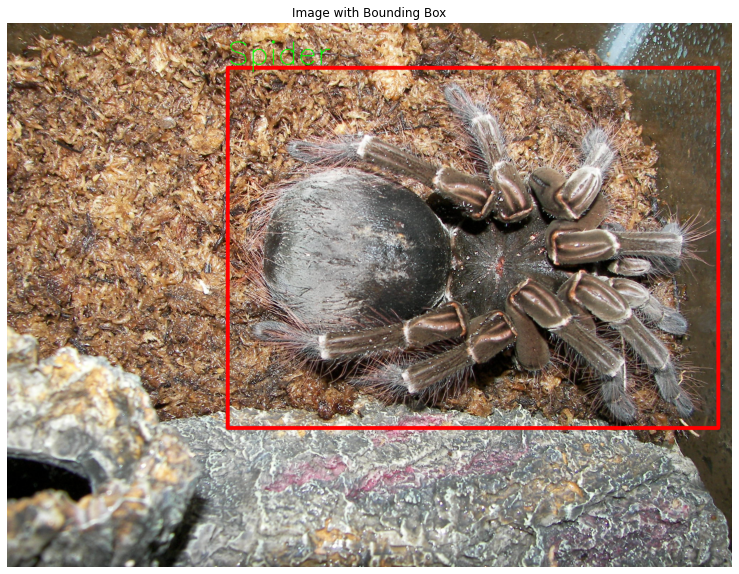

In [ ]:
#Este codigo muestra todas las boxes dentro de una imagen. Luego será usado nuevamente
test_img_id=['3c095a6526719d58']
img_url =img_box_pd.loc[img_box_pd["ImageID"]==test_img_id[0]]['OriginalURL'].values[0]
img = io.imread(img_url)
h,w,ch =img.shape
bbox = anota_box_pd[anota_box_pd['ImageID']==test_img_id[0]]
for i,f in bbox.iterrows():
  print("indice:{}".format(i))
  print("fes:{}".format(f))
  xmin =int(f['XMin']*w)
  xmax = int(f['XMax']*w)
  ymin = int(f['YMin']*h)
  ymax = int(f['YMax']*h)
  label = f['LabelName']
  clase = clas_desc_pd[clas_desc_pd[0]==label]
  cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 10)
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(img, clase[1].values[0], (xmin,ymin-10), font, 3, (0,255,0), 2)
plt.figure(figsize=(15,10))
plt.title('Image with Bounding Box')
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
#Buscar en la tabla de descripciones de clases los ID de Personas y Carros
clas_desc_pd.loc[clas_desc_pd[1].isin(['Fish','Sea turtle'])]

,0,1
3,/m/0120dh,Sea turtle
462,/m/0ch_cf,Fish


In [ ]:
#Tomemos aleatoriamente 500 imagenes de tortugas y 500 de peces
#Lineas de clases
tortuga_pd =clas_desc_pd[clas_desc_pd[1]=='Sea turtle']
pez_pd = clas_desc_pd[clas_desc_pd[1]=='Fish']
#Etiquetas de clases (Estas etiquetas serán primordiales cuando se vaya a copiar a disco local)
tortuga_label_pd = tortuga_pd[0].values[0]
pez_label_pd = pez_pd[0].values[0]
#Usemos las etiquetas para bajar las box de anotaciones
tortuga_box_an= anota_box_pd[anota_box_pd['LabelName']==tortuga_label_pd]
pez_box_an = anota_box_pd[anota_box_pd['LabelName']==pez_label_pd]
#Bajemos los ID de las clases
tortuga_id=tortuga_box_an['ImageID']
pez_id =pez_box_an['ImageID']
#Dado que pueden haber varias personas en una imagen, podrían aparecer ID's repetidos. Vamos a usar una sola
tortuga_id = np.unique(tortuga_id)
pez_id= np.unique(pez_id)
#******Escoger aleatoriamente 1000 imagenes de cada clase
n=500
sub_tortuga_id =random.sample(list(tortuga_id),n)
sub_pez_id = random.sample(list(pez_id),n)


In [ ]:
#Usemos pandas para crear los dos conjuntos de datos a partir de los Sub ID's
sub_tortuga_pd = img_box_pd.loc[img_box_pd['ImageID'].isin(sub_tortuga_id)]
sub_pez_pd = img_box_pd.loc[img_box_pd['ImageID'].isin(sub_pez_id)]
print(sub_tortuga_pd.shape)
print(sub_pez_pd.shape)

(500, 12)
(500, 12)


In [ ]:
sub_tortuga_pd.head()

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
1284,92cc178b99434eca,train,https://c3.staticflickr.com/8/7091/14028628795...,https://www.flickr.com/photos/fbohac/14028628795,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/fbohac/,Fil.Al,Turtles,1134182,b+QNVkFpWyM6d4vzrVcU6w==,https://c1.staticflickr.com/8/7091/14028628795...,0.0
3785,3d517a5b5579825d,train,https://c6.staticflickr.com/1/650/21152463585_...,https://www.flickr.com/photos/77423179@N02/211...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/77423179@N02/,Melissa Hillier,Chely the Sea Turtle,1451151,WQgv01ZrMsRiSvpYAHX49A==,https://c5.staticflickr.com/1/650/21152463585_...,0.0
7210,755fe53483d707f6,train,https://farm7.staticflickr.com/3160/2634046280...,https://www.flickr.com/photos/paulmannix/26340...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/paulmannix/,Paul Mannix,"A leatherback turtle laying her eggs, Turtle B...",8003405,LNeEmsET9fe00UHHglvhxQ==,https://c3.staticflickr.com/4/3160/2634046280_...,NaN
16540,51e7e321b69b8ad8,train,https://c1.staticflickr.com/1/275/19563842258_...,https://www.flickr.com/photos/usfwsmidwest/195...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/usfwsmidwest/,USFWSmidwest,Ornate box turtle crossing the road,6885653,07u0esYckTSSb5i9H9ZVaQ==,https://c2.staticflickr.com/1/275/19563842258_...,0.0
48331,1045aff99382a053,train,https://farm4.staticflickr.com/1323/5102520099...,https://www.flickr.com/photos/noaaphotolib/510...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/noaaphotolib/,NOAA Photo Library,anim1004,500195,7QayI+upMjNQ2pownM/vqw==,https://c7.staticflickr.com/2/1323/5102520099_...,0.0


In [ ]:
row = sub_tortuga_pd.loc[sub_tortuga_pd['ImageID']=='d52fd12b61058a1e']
print(row['OriginalLandingURL'])


Series([], Name: OriginalLandingURL, dtype: object)


In [ ]:
#Convirtiendo los dos subgrupos de imagenes en diccionarios.
sub_tortuga_dict =sub_tortuga_pd[['ImageID', 'OriginalURL']].set_index('ImageID')["OriginalURL"].to_dict()
sub_pez_dict =sub_pez_pd[['ImageID', 'OriginalURL']].set_index('ImageID')["OriginalURL"].to_dict()


In [ ]:
clases = [sub_tortuga_dict, sub_pez_dict]


In [ ]:
len(clases[0])

500

In [ ]:
#Creando dos carpetas en el ambiente virtual para copiar las imagenes de los dos subgrupos
!mkdir -p "Tortuga"
!mkdir -p "Pez"

In [ ]:
"""Salvando las imagenes a nuestros directorios locales. Observe el uso de "try" porque 
es posible que alguna dirección ya no exista"""
for i,o in enumerate(['Tortuga','Pez']):
  errores=0
  
  for img_id, url in clases[i].items():
    try:
      img = io.imread(url)
      ruta = o +'/'+img_id+".jpg"
      io.imsave(ruta,img)
    except Exception as e:
      errores+=1
  print(f"Imagenes perdidas:{errores}")



/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Imagenes perdidas:41
Imagenes perdidas:35


In [ ]:
#Cerciorandonos si efectivamente se perdieron algunas imagenes
!ls 'Tortuga' | wc -l
!ls 'Pez' | wc -l

459
465


In [ ]:
#Creemos los directorios de train y test en nuestro drive
!mkdir -p "/content/drive/MyDrive/FasterRCNN/dataset/train2020"
!mkdir -p "/content/drive/MyDrive/FasterRCNN/dataset/test2020"


In [ ]:
from shutil import copyfile

In [ ]:
"""Este codigo nos permite tomar el 80% de las 1000 imagenes (tortugas y personas) y
copiarlas a la carpeta train. El 20% restante copiadas a la carpeta test."""
clas=['Tortuga', 'Pez']
for i in range(len(clas)):
  imgs = os.listdir(clas[i])
  random.shuffle(imgs)
  percent = int(n*0.8)
  train_imgs=imgs[:percent]
  test_imgs = imgs[percent:]

  for f in range(len(train_imgs)):
    src = os.path.join(clas[i],train_imgs[f])
    dst = os.path.join('/content/drive/MyDrive/FasterRCNN/dataset/train2020/'+train_imgs[f])
    copyfile(src,dst)
  for f in range(len(test_imgs)):
    src = os.path.join(clas[i],test_imgs[f])
    dst = os.path.join('/content/drive/MyDrive/FasterRCNN/dataset/test2020/'+test_imgs[f])
    copyfile(src,dst)
#print(imgs)

In [ ]:
#Comprobando que si fueron copiadas en drive
!ls '/content/drive/MyDrive/FasterRCNN/dataset/train2020/' | wc -l
!ls '/content/drive/MyDrive/FasterRCNN/dataset/test2020/' | wc -l

907
234


In [ ]:
import sys

In [ ]:
"""Aqui creamos un dataframe de pandas con la información
que es necesaria para nuestro entrenamiento: nombre del archivo imagen,
x1,x2,y1,y2 (datos de la box) y la etiqueta de clase (tortuga o pez).""" 
etiquetas =[tortuga_label_pd, pez_label_pd]
train_df = pd.DataFrame(columns=['Nombre','Xmin','Xmax','Ymin', 'Ymax','Label'])

train_imgs = os.listdir('/content/drive/MyDrive/FasterRCNN/dataset/train2020/')
for i in range(len(train_imgs)):
  sys.stdout.flush()
  img_nombre = train_imgs[i]
  img_id=img_nombre[0:16]
  tmp_df = anota_box_pd[anota_box_pd['ImageID']==img_id]
  for index, row in tmp_df.iterrows():
    labelName = row['LabelName']
    for i in range(len(etiquetas)):
      if labelName == etiquetas[i]:
        train_df = train_df.append({'Nombre':img_nombre,
                                    'Xmin':row['XMin'],
                                    'Xmax':row['XMax'],
                                    'Ymin':row['YMin'],
                                    'Ymax':row['YMax'],
                                    'Label':clas[i]},
                                   ignore_index=True)


In [ ]:
train_df.head(10)

,Nombre,Xmin,Xmax,Ymin,Ymax,Label
0,9795a3575f1b6ecf.jpg,0.000000,0.861111,0.417438,0.773148,Tortuga
1,9795a3575f1b6ecf.jpg,0.000000,0.751029,0.164352,0.435957,Tortuga
2,9795a3575f1b6ecf.jpg,0.354938,0.840535,0.073302,0.207562,Tortuga
3,7c91bcf24aa98d3b.jpg,0.013750,0.864375,0.209193,0.954972,Tortuga
4,28a5f0ff550dee1d.jpg,0.240625,0.740625,0.224594,0.824936,Tortuga
5,8f81d3b5d26f9047.jpg,0.028125,0.975625,0.306411,0.770191,Tortuga
6,07e66ff2a028af2c.jpg,0.362500,0.758125,0.355000,0.638333,Tortuga
7,56902f57b0ff3efa.jpg,0.000000,0.998438,0.223438,0.998438,Tortuga
8,d9fd6ea29f96b8a5.jpg,0.173750,0.893750,0.475164,0.867854,Tortuga
9,d9fd6ea29f96b8a5.jpg,0.471250,0.863750,0.008435,0.371134,Tortuga


In [ ]:
#Es claro que este valor sera mayor al numero de imagenes de la carpeta train
train_df.shape

(2828, 6)

In [ ]:
#Realizando lo mismo para la carpeta de test.
test_df = pd.DataFrame(columns=['Nombre','Xmin','Xmax','Ymin', 'Ymax','Label'])

test_imgs = os.listdir('/content/drive/MyDrive/FasterRCNN/dataset/test2020/')
for i in range(len(test_imgs)):
  sys.stdout.flush()
  img_nombre = test_imgs[i]
  img_id=img_nombre[0:16]
  tmp_df = anota_box_pd[anota_box_pd['ImageID']==img_id]
  for index, row in tmp_df.iterrows():
    labelName = row['LabelName']
    for i in range(len(etiquetas)):
      if labelName == etiquetas[i]:
        test_df = test_df.append({'Nombre':img_nombre,
                                    'Xmin':row['XMin'],
                                    'Xmax':row['XMax'],
                                    'Ymin':row['YMin'],
                                    'Ymax':row['YMax'],
                                    'Label':clas[i]},
                                   ignore_index=True)

In [ ]:
#convirtiendo los dataframes creados a archivos CSV.
train_df.to_csv('train.csv')
test_df.to_csv('test.csv')


In [ ]:
"""Este codigo nos sirve para crear un archivo texto donde estara la informacion
de cada imagen de entrenamiento con sus datos de bbox y etiqueta.
Observe como cada linea es un bbox diferente. El archivo de imagen se puede repetir
tantas veces como bbox tenga la imagen."""
train_df = pd.read_csv('train.csv')
with open("/content/drive/MyDrive/FasterRCNN/entrenamiento2020.txt", 'w+') as f:
  for idx, row in train_df.iterrows():
    img = cv2.imread('/content/drive/MyDrive/FasterRCNN/dataset/train2020/'+ row['Nombre'])
    h,w = img.shape[:2]
    x1 = int(row['Xmin']*w)
    x2 = int(row['Xmax']*w)
    y1 = int(row['Ymin']*h)
    y2 = int(row['Ymax']*h)
    archivo = os.path.join('/content/drive/MyDrive/FasterRCNN/dataset/train2020',row['Nombre'])
    label = row['Label']
    f.write(archivo + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + label + '\n')



In [ ]:
#Igualmente para el archivo test.

test_df = pd.read_csv('test.csv')
with open("/content/drive/MyDrive/FasterRCNN/test2020.txt", 'w+') as f:
  for idx, row in test_df.iterrows():
    img = cv2.imread('/content/drive/MyDrive/FasterRCNN/dataset/test2020/'+ row['Nombre'])
    h,w = img.shape[:2]
    x1 = int(row['Xmin']*w)
    x2 = int(row['Xmax']*w)
    y1 = int(row['Ymin']*h)
    y2 = int(row['Ymax']*h)
    archivo = os.path.join('/content/drive/MyDrive/FasterRCNN/dataset/test2020',row['Nombre'])
    label = row['Label']
    f.write(archivo + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + label + '\n')


**FIN!!!!.
Revise en su drive y compruebe que exista una carpeta llamada FasterRCNN y dentro de ella los dos archivos de texto (test y train), tambien deberá estar una subcarpeta llamada dataset y dentro de esta dos subcarpetas: train que contiene todas las imagenes fisicas de entrenamiento, y test, que contiene las iamgenes fisicas de prueba o validacion.**